In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_data = pd.read_csv('D:\Anul IV\AI\Laboratorul II\student-mat.csv', header = 1, delimiter=';')
student_data.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
                        'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
                        'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'farmel', 'freetime', 'goout',
                        'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']

In [3]:
student_data.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,farmel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


In [4]:
student_data.isnull().values.any()

False

In [5]:
XY = student_data[['absences', 'g3']]
XY = XY[XY['absences'] < 20]
XY = XY[XY['g3'] > 4]
X = student_data['absences']
Y = student_data['g3']
X.count() == Y.count()

True

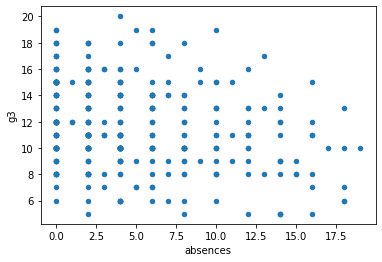

In [6]:
XY.plot.scatter(y = 'g3', x = 'absences')

In [7]:
XY.corr()

,absences,g3
absences,1.000000,-0.251526
g3,-0.251526,1.000000


In [8]:
XY.describe()


,absences,g3
count,337.000000,337.000000
mean,4.934718,11.596439
std,4.744221,3.194636
min,0.000000,5.000000
25%,2.000000,10.000000
50%,4.000000,11.000000
75%,8.000000,14.000000
max,19.000000,20.000000


In [9]:
model = LinearRegression(normalize = True)

In [10]:
scores = []
kfold = KFold(n_splits = 10, shuffle = True, random_state=42)
X = XY.as_matrix(['absences'])
Y = XY.as_matrix(['g3'])
Y

c:\users\staseamba\envs\laboratorul2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\staseamba\envs\laboratorul2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([[ 6],
       [10],
       [15],
       [10],
       [15],
       [11],
       [ 6],
       [19],
       [15],
       [ 9],
       [12],
       [14],
       [11],
       [16],
       [14],
       [14],
       [10],
       [ 5],
       [10],
       [15],
       [15],
       [16],
       [12],
       [ 8],
       [ 8],
       [11],
       [15],
       [11],
       [11],
       [12],
       [17],
       [16],
       [12],
       [15],
       [ 6],
       [18],
       [15],
       [11],
       [13],
       [12],
       [18],
       [11],
       [ 9],
       [ 6],
       [11],
       [20],
       [14],
       [ 7],
       [13],
       [13],
       [10],
       [11],
       [13],
       [10],
       [15],
       [15],
       [ 9],
       [16],
       [11],
       [11],
       [ 9],
       [ 9],
       [10],
       [15],
       [12],
       [ 6],
       [ 8],
       [16],
       [15],
       [10],
       [ 5],
       [14],
       [10],
       [10],
       [11],
       [10],
       [ 5],

In [11]:
X

array([[ 4],
       [10],
       [ 2],
       [ 4],
       [10],
       [ 0],
       [ 6],
       [ 0],
       [ 0],
       [ 0],
       [ 4],
       [ 2],
       [ 2],
       [ 0],
       [ 4],
       [ 6],
       [ 4],
       [16],
       [ 4],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [ 2],
       [14],
       [ 2],
       [ 4],
       [ 4],
       [16],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 7],
       [ 2],
       [ 8],
       [ 8],
       [ 2],
       [ 0],
       [14],
       [ 8],
       [12],
       [ 4],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 6],
       [ 0],
       [ 6],
       [ 8],
       [ 0],
       [ 4],
       [ 2],
       [ 2],
       [ 6],
       [ 6],
       [ 4],
       [ 2],
       [ 0],
       [ 2],
       [ 4],
       [ 4],
       [ 2],
       [12],
       [ 0],
       [ 0],
       [ 2],
       [ 2],
       [ 6],
       [ 8],
       [ 0],
       [ 2],
       [12],

In [16]:
trained_model = model.fit(X, Y)
print(trained_model.predict(np.array([[4]])))

[[11.75475323]]


In [13]:
trained_model.score(X, Y)

0.06326515387685205

In [14]:
model.score(X, Y)

0.06326515387685205